In [1]:
import sys
import os

import pandas as pd
import numpy as np
import pylab as pl
# from scipy import stats
from sklearn import mixture

import seaborn as sns

# import some custom funcs
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import Stable.ConnectomeFunctions as cf

import Development.Neuprint as dv
import neuprint as neu

In [2]:
import plotting as putil
import utils as util
import neuprint_funcs as npf

In [3]:
basedir = '/Users/julianarhee/Documents/rutalab/projects/connectome/neuprint-playground'

figdir = os.path.join(basedir, 'connectivity')
if not os.path.exists(figdir):
    os.makedirs(figdir)
print(figdir)

/Users/julianarhee/Documents/rutalab/projects/connectome/neuprint-playground/connectivity


In [4]:
plot_style = 'white'
putil.set_sns_style(style=plot_style)
bg_color = [0.7]*3 if plot_style=='dark' else 'k'

In [5]:
# def search_fun(start_id,end_id,cm,count=0):
#     # From Charlie
#     # cm = thresholded connectivity matrix 
    
#    # print('search')
#     t_row = cm[start_id,:]
#     t_id = t_row[end_id]
#     if t_id<1 and count<4:
#         id_thresh = np.where(t_row>0)[0]
#         counts = np.array(np.zeros(len(id_thresh)))-1
#         for i,t in enumerate(id_thresh):
#             counts[i] = search_fun(t,end_id,cm,count+1)
#         count = np.min(counts)
#     else:
#         count = count+1
        
#    # print(count)
#     return count


In [6]:
from neuprint import NeuronCriteria as NC

In [7]:
#aotu25 = 892294329 (RH)
#aotu19 = 799868224 (RH)


In [8]:
# Example: Fetch all downstream connections FROM a set of neurons
neuron_df, conn_df = neu.fetch_adjacencies([799868224], None)


In [9]:
upstream_bodyId = 799868224 # AOTU019_R
# downstream_bodyId = 1140245595 # DNa02
downstream_bodyId = 1262014782 # DNa04

min_weight=10

paths = neu.queries.fetch_shortest_paths(upstream_bodyId, downstream_bodyId, 
                                         min_weight=10, intermediate_criteria=None, timeout=5.0, client=None)
paths

,path,bodyId,type,weight
0,0,799868224,AOTU019,0
1,0,1789613296,LAL074,25
2,0,1262014782,DNa04,147


## Get all DNs

In [10]:
# Example: Select bodies by type name pattern 
# ∼1300 DNs
criteria_dn = NC(type='DN.*')
neuron_df, roi_counts_df = neu.fetch_neurons(criteria_dn)

/Users/julianarhee/miniforge3/envs/neuprint/lib/python3.11/site-packages/neuprint/client.py:609: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  neuron_props_val = df_results.iloc[0][0]


In [11]:
# https://connectome-neuprint.github.io/neuprint-python/docs/notebooks/QueryTutorial.html#Neuron-Search-Criteria
# The total count of pre-synaptic and post-synaptic points within each neuron 
# are given in the pre and post columns:
# neuron_df[['bodyId', 'instance', 'type', 'pre', 'post', 'status', 'cropped', 'size']]

DN_bodyIds = list(neuron_df['bodyId'].unique())
len(DN_bodyIds)

107

## Get conections from 1 of the AOTUs

In [24]:
aotu019_L = 1605518663 # This is the CONTRA hemisphere
aotu019_R = 799868224
aotu025 = 892294329

In [20]:
dn_bodyId = 1140245595 #'DNa04' #
aotu_bodyId = 799868224 #1605518663 #'AOTU019' #

paths_from_19 = neu.queries.fetch_shortest_paths(aotu_bodyId, dn_bodyId, #DN_bodyIds[33], 
                                         min_weight=10, intermediate_criteria=None, timeout=5.0, client=None)

# shortest = paths_from_19.groupby('path').count() #['bodyId'].argmin() #['bodyId'] #.argmin() #.reset_index()
# Group by 'Category' and count the number of elements in each group
group_counts = paths_from_19.groupby('path').size()

# Get the group(s) with the fewest number of elements
min_group = group_counts[group_counts == group_counts.min()] #.reset_index() #['path'][0]
min_group.iloc[0]
    

3

In [21]:
paths_from_19_R = neu.queries.fetch_simple_connections(aotu019_R, DN_bodyIds,#DN_bodyIds[33], 
                                        min_weight=10, client=None)
paths_from_19_R

,bodyId_pre,bodyId_post,weight,type_pre,type_post,instance_pre,instance_post,conn_roiInfo


In [22]:
paths_from_19_L = neu.queries.fetch_simple_connections(aotu019_L, DN_bodyIds,#DN_bodyIds[33], 
                                        min_weight=10, client=None)
paths_from_19_L

,bodyId_pre,bodyId_post,weight,type_pre,type_post,instance_pre,instance_post,conn_roiInfo
0,1605518663,1139909038,352,AOTU019,DNa03,AOTU019(ADM10)_L,DNa03_R,"{'LX(R)': {'pre': 168, 'post': 168}, 'LAL(R)':..."
1,1605518663,1140245595,192,AOTU019,DNa02,AOTU019(ADM10)_L,DNa02_R,"{'VMNP': {'pre': 89, 'post': 88}, 'EPA(R)': {'..."
2,1605518663,1262014782,93,AOTU019,DNa04,AOTU019(ADM10)_L,DNa04_R,"{'VMNP': {'pre': 63, 'post': 63}, 'EPA(R)': {'..."
3,1605518663,1904885509,39,AOTU019,DNb02,AOTU019(ADM10)_L,DNb02_R,"{'VMNP': {'pre': 38, 'post': 38}, 'IPS(R)': {'..."
4,1605518663,1477239390,36,AOTU019,DNb02,AOTU019(ADM10)_L,DNb02_R,"{'VMNP': {'pre': 28, 'post': 28}, 'SPS(R)': {'..."
5,1605518663,5813068840,23,AOTU019,DNp18,AOTU019(ADM10)_L,DNp18_R,"{'VMNP': {'pre': 22, 'post': 22}, 'VES(R)': {'..."
6,1605518663,1170939344,19,AOTU019,DNa01,AOTU019(ADM10)_L,DNa01_R,"{'LX(R)': {'pre': 12, 'post': 12}, 'LAL(R)': {..."


In [23]:
paths_from_25 = neu.queries.fetch_simple_connections(aotu025, DN_bodyIds,#DN_bodyIds[33], 
                                        min_weight=10, client=None)
paths_from_25

NameError: name 'aotu025' is not defined

In [228]:
#paths_from_19[paths_from_19['type'].isnull()]['type'] = 'Other'

In [229]:
paths_from_19

,bodyId_pre,bodyId_post,weight,type_pre,type_post,instance_pre,instance_post,conn_roiInfo
0,892294329,1140245595,160,AOTU025,DNa02,AOTU025_R,DNa02_R,"{'VMNP': {'pre': 64, 'post': 64}, 'SPS(R)': {'..."
1,892294329,1139909038,115,AOTU025,DNa03,AOTU025_R,DNa03_R,"{'LX(R)': {'pre': 65, 'post': 65}, 'LAL(R)': {..."
2,892294329,1477239390,13,AOTU025,DNb02,AOTU025_R,DNb02_R,"{'VMNP': {'pre': 13, 'post': 13}, 'VES(R)': {'..."


# Aggregate all connections

In [230]:
#aotu25 = 892294329 (RH)
#aotu19 = 799868224 (RH)

In [231]:
downstream_bodyIds = ['DNa02', 'DNa03', 'DNa11', 'LAL013']
neu.queries.fetch_simple_connections(downstream_bodyIds, downstream_bodyIds)

,bodyId_pre,bodyId_post,weight,type_pre,type_post,instance_pre,instance_post,conn_roiInfo
0,1139909038,1140245595,271,DNa03,DNa02,DNa03_R,DNa02_R,"{'LX(R)': {'pre': 137, 'post': 137}, 'LAL(R)':..."
1,894702888,1139909038,85,LAL013,DNa03,LAL013_R,DNa03_R,"{'LX(R)': {'pre': 15, 'post': 15}, 'LAL(R)': {..."
2,894702888,1140245595,29,LAL013,DNa02,LAL013_R,DNa02_R,"{'VMNP': {'pre': 12, 'post': 12}, 'IPS(R)': {'..."
3,1139909038,894702888,16,DNa03,LAL013,DNa03_R,LAL013_R,"{'LX(R)': {'pre': 11, 'post': 11}, 'LAL(R)': {..."
4,1140245595,1139909038,1,DNa02,DNa03,DNa02_R,DNa03_R,"{'LX(R)': {'pre': 1, 'post': 1}, 'LAL(R)': {'p..."


In [268]:
rank_by_sum = False
aotu019_L = 1605518663 # This is the CONTRA hemisphere
aotu019_R = 799868224
aotu025 = 892294329
min_weight = 20
n_nodes = 3
n_plot = 3

network_node_list = []
network_path_list = []

for upstream_bodyId in [aotu019_L, aotu019_R, aotu025]:
    # Get all paths that are < 3 synapses:
    path_list = []
    path_ctr = 0
    for ix, id_ in enumerate(DN_bodyIds):
        paths_ = neu.queries.fetch_shortest_paths(upstream_bodyId, id_,
                                             min_weight=min_weight, intermediate_criteria=None, timeout=5.0, client=None)
        paths_.loc[paths_['type'].isnull(), 'type'] = 'Other'
        
        if len(paths_)==0: # no connections
            continue

        if len(paths_) <= n_nodes:
            paths_['DN_id'] = id_
            paths_['path'] = path_ctr
            paths_['path_length'] = len(paths_)-1
            path_ctr += 1
            path_list.append(paths_)

        path_list = [v for v in path_list if len(v) <= n_nodes]
        # # Group by 'Category' and count the number of elements in each group
        # group_counts = paths_.groupby('path').size()
        
        # # Get the group(s) with the fewest number of elements
        # min_group = group_counts[group_counts == group_counts.min()] #.reset_index()['path'][0]
    
        # # Save if there are less than or equal to 3 synapses
        # if min_group.iloc[0] <= 3:
        #     # shortest_path = min_group.index.tolist()[0]
        #     #path_list.append( paths_[paths_['path']==shortest_path])
        #     paths_['DN_id'] = id_
        #     path_list.append(paths_)
    all_paths_ = pd.concat(path_list)
    
    # Group by 'X' and sum the 'Values' column
    if rank_by_sum:
        group_prod = all_paths_.groupby('DN_id')['weight'].sum()
    else:
        all_paths_['weight_1'] = all_paths_.groupby('DN_id')['weight'].transform(lambda x: x.replace(0, 0.00001))
        group_prod = all_paths_[all_paths_['path_length']>1].groupby('DN_id')['weight_1'].prod() #.reset_index()

    # Get the group or index with the largest sum
    # max_group = group_sums.idxmax()
    # print(f"The group with the largest sum is: {max_group}")
    
    # Get the top 3 groups with the largest sums
    ranked_top_groups = group_prod.nlargest(n_plot)
    ranked_top_ids = ranked_top_groups.index.tolist()
    print("The top {} groups with the largest prod are:".format(n_plot))
    print(ranked_top_groups)
    
    top_ids = list(all_paths_[all_paths_['path_length']==1]['DN_id'].values)
    print("Direct connections:")
    print(top_ids)
    top_ids.extend(ranked_top_ids)

    network_path_list.append(all_paths_[all_paths_['DN_id'].isin(top_ids)])

    # Cnvert to node list, each row represents 1 edge
    node_list = []
    for d, path_ in all_paths_[all_paths_['DN_id'].isin(top_ids)].groupby(['DN_id', 'path']):
        for i in range(len(path_)-1):
            if path_.iloc[i]['bodyId'] == aotu019_L:
                source_type = 'AOTU019_L'
            elif path_.iloc[i]['bodyId'] == aotu019_R:
                source_type = 'AOTU019_R'
            else:
                source_type = path_.iloc[i]['type']
            df_ = pd.DataFrame({
                       'source_id': path_.iloc[i]['bodyId'],
                       'target_id': path_.iloc[i+1]['bodyId'],
                       'source': source_type, #path_.iloc[i]['type'],
                       'target': path_.iloc[i+1]['type'],
                       'weight': path_.iloc[i+1]['weight']
            }, index=[i])
            node_list.append(df_)
    node_df_ = pd.concat(node_list).reset_index(drop=True)

    network_node_list.append(node_df_)

The top 3 groups with the largest prod are:
DN_id
1963869286    0.05486
1100404634    0.01025
984030630     0.00900
Name: weight_1, dtype: float64
Direct connections:
[1139909038, 1139909038, 1140245595, 1140245595, 1262014782, 1262014782, 1477239390, 1477239390, 1904885509, 1904885509, 5813068840, 5813068840]
The top 3 groups with the largest prod are:
DN_id
1139909038    0.03810
1262014782    0.03675
1655997973    0.01450
Name: weight_1, dtype: float64
Direct connections:
[]
The top 3 groups with the largest prod are:
DN_id
1006984280    0.05418
1037393225    0.01302
1963869286    0.00676
Name: weight_1, dtype: float64
Direct connections:
[1139909038, 1139909038, 1140245595, 1140245595]


In [269]:
# 1139909038 in DN_bodyIds
# DN_types = ['DNa01', 'DNa02', 'DNa03', 'DNa04', 'DNa11', 'DNa010', 'DNp31', 'LAL013']

# DNa01 = 1170939344
# DNa03 = 1139909038
# DNa02 = 1140245595
# DNa04 = 1262014782
# DNa10_L = 1222928995
# DNa10_R = 707116522
# LAL013 = 894702888
# DNp31 = 1006984280


extra_DNs = [ 1139909038, 1140245595, 1262014782, 1222928995, 707116522, 1006984280] #, 894702888] #, 1006984280]

In [270]:
rank_by_sum = False
# aotu019_L = 1605518663 # This is the CONTRA hemisphere
# aotu019_R = 799868224
# aotu025 = 892294329
min_weight = 20
n_nodes = 2
n_plot = 5

DN_node_list = []
DN_path_list = []
for upstream_bodyId in extra_DNs:

    # Get all paths that are < 3 synapses:
    path_list = []
    for ix, id_ in enumerate(extra_DNs):
        paths_ = neu.queries.fetch_shortest_paths(upstream_bodyId, id_,
                                             min_weight=min_weight, intermediate_criteria=None, timeout=5.0, client=None)
        paths_.loc[paths_['type'].isnull(), 'type'] = 'Other'
            
        if len(paths_)==0: # no connections
            continue

        if len(paths_) <= n_nodes:
            paths_['DN_id'] = id_
            path_list.append(paths_)

        path_list = [v for v in path_list if len(v) <= n_nodes]

        # # Group by 'Category' and count the number of elements in each group
        # group_counts = paths_.groupby('path').size()
        
        # # Get the group(s) with the fewest number of elements
        # min_group = group_counts[group_counts == group_counts.min()] #.reset_index()['path'][0]
    
        # # Save if there are less than or equal to 3 synapses
        # if min_group.iloc[0] <= 3:
        #     # shortest_path = min_group.index.tolist()[0]
        #     #path_list.append( paths_[paths_['path']==shortest_path])
        #     paths_['DN_id'] = id_
        #     path_list.append(paths_)
    if len(path_list) == 0:
        print("No direct conns: {}-{}".format(upstream_bodyId, id_))
        continue
    all_paths_ = pd.concat(path_list)
    
    # Group by 'X' and sum the 'Values' column
    if rank_by_sum:
        group_prod = all_paths_.groupby('DN_id')['weight'].sum()
    else:
        all_paths_['weight_1'] = all_paths_.groupby('DN_id')['weight'].transform(lambda x: x.replace(0, 0.00001))
        group_prod = all_paths_.groupby('DN_id')['weight_1'].prod() #.reset_index()

    # Get the group or index with the largest sum
    # max_group = group_sums.idxmax()
    # print(f"The group with the largest sum is: {max_group}")
    
    # Get the top 3 groups with the largest sums
    top_groups = group_prod.nlargest(n_plot)
    top_ids = top_groups.index.tolist()
    
    print("The top {} groups with the largest PROD are:".format(n_plot))
    print(top_groups)

    DN_path_list.append(all_paths_[all_paths_['DN_id'].isin(top_ids)])

    # Cnvert to node list, each row represents 1 edge
    node_list = []
    for d, path_ in all_paths_[all_paths_['DN_id'].isin(top_ids)].groupby(['DN_id', 'path']):
        for i in range(len(path_)-1):
            if path_.iloc[i]['bodyId'] == aotu019_L:
                source_type = 'AOTU019_L'
            elif path_.iloc[i]['bodyId'] == aotu019_R:
                source_type = 'AOTU019_R'
            else:
                source_type = path_.iloc[i]['type']
            df_ = pd.DataFrame({
                       'source_id': path_.iloc[i]['bodyId'],
                       'target_id': path_.iloc[i+1]['bodyId'],
                       'source': source_type, #path_.iloc[i]['type'],
                       'target': path_.iloc[i+1]['type'],
                       'weight': path_.iloc[i+1]['weight']
            }, index=[i])
            node_list.append(df_)
    node_df_ = pd.concat(node_list).reset_index(drop=True)

    DN_node_list.append(node_df_)

The top 5 groups with the largest PROD are:
DN_id
1140245595    0.00271
Name: weight_1, dtype: float64
No direct conns: 1140245595-1006984280
No direct conns: 1262014782-1006984280
No direct conns: 1222928995-1006984280
No direct conns: 707116522-1006984280
No direct conns: 1006984280-1006984280


In [271]:
AOTU_df = pd.concat(network_node_list).reset_index(drop=True)
AOTU_paths = pd.concat(network_path_list)

DN_df = pd.concat(DN_node_list).reset_index(drop=True)
DN_paths = pd.concat(DN_path_list)

In [272]:
node_df = pd.concat([AOTU_df, DN_df], axis=0).reset_index()
print(AOTU_df.shape, DN_df.shape, node_df.shape)
print(node_df.head())

(26, 5) (1, 5) (27, 6)
   index   source_id   target_id     source   target  weight
0      0  1605518663  1663759398  AOTU019_L  PVLP060      36
1      1  1663759398   984030630    PVLP060    DNp34      25
2      2  1605518663  5813070594  AOTU019_L    PS112      25
3      3  5813070594  1100404634      PS112    DNp26      41
4      4  1605518663  1139909038  AOTU019_L    DNa03     352


In [273]:
all_paths = pd.concat([AOTU_paths, DN_paths], axis=0).reset_index()
all_paths.shape

(45, 8)

In [274]:
# all_paths['weight_1'] = all_paths.groupby('DN_id')['weight'].transform(lambda x: x.replace(0, 1))
# all_paths.groupby('DN_id')['weight_1'].prod().reset_index()
all_paths['type'].unique()

array(['AOTU019', 'PVLP060', 'DNp34', 'PS112', 'DNp26', 'DNa03', 'DNa02',
       'DNa04', 'DNb02', 'PS014', 'DNb03', 'DNp18', 'PS232', 'LAL074',
       'DNb01', 'AOTU025', 'PS042', 'DNp31', 'DNb04'], dtype=object)

In [275]:
sorted(sorted(node_df['target'].unique()))

['DNa02',
 'DNa03',
 'DNa04',
 'DNb01',
 'DNb02',
 'DNb03',
 'DNb04',
 'DNp18',
 'DNp26',
 'DNp31',
 'DNp34',
 'LAL074',
 'PS014',
 'PS042',
 'PS112',
 'PS232',
 'PVLP060']

In [276]:
for i, v in node_df.iterrows():
    if v['target'] == 'AOTU019':
        node_df.loc[i, 'target'] = 'AOTU019_L' if v['target_id']==1605518663 else 'AOTU019_R'

In [277]:
v.index

Index(['index', 'source_id', 'target_id', 'source', 'target', 'weight'], dtype='object')

In [278]:
node_df

,index,source_id,target_id,source,target,weight
0,0,1605518663,1663759398,AOTU019_L,PVLP060,36
1,1,1663759398,984030630,PVLP060,DNp34,25
2,2,1605518663,5813070594,AOTU019_L,PS112,25
3,3,5813070594,1100404634,PS112,DNp26,41
4,4,1605518663,1139909038,AOTU019_L,DNa03,352
5,5,1605518663,1140245595,AOTU019_L,DNa02,192
6,6,1605518663,1262014782,AOTU019_L,DNa04,93
7,7,1605518663,1477239390,AOTU019_L,DNb02,36
8,8,1605518663,1904885509,AOTU019_L,DNb02,39
9,9,1605518663,1292713484,AOTU019_L,PS014,211


In [279]:
# curr_paths = []
# for ix, id_ in enumerate(DN_bodyIds):
#     paths_ = neu.queries.fetch_shortest_paths(upstream_bodyId, id_,
#                                          min_weight=10, intermediate_criteria=None, timeout=5.0, client=None)
#     paths_.loc[paths_['type'].isnull(), 'type'] = 'Other'
    
#     if len(paths_)==0: # no connections
#         continue
#     curr_paths.append(paths_)

In [281]:
# sorted(all_paths.loc[1]['type'].unique())
#sorted(all_paths.loc[2]['type'].unique())

In [282]:
# https://towardsdatascience.com/visualizing-networks-in-python-d70f4cbeb259
import networkx as nx

In [283]:
G = nx.from_pandas_edgelist(node_df, source='source', target='target')

In [284]:
for i in G.edges:
    print(i)

('AOTU019_L', 'PVLP060')
('AOTU019_L', 'PS112')
('AOTU019_L', 'DNa03')
('AOTU019_L', 'DNa02')
('AOTU019_L', 'DNa04')
('AOTU019_L', 'DNb02')
('AOTU019_L', 'PS014')
('AOTU019_L', 'DNp18')
('PVLP060', 'DNp34')
('PS112', 'DNp26')
('DNa03', 'PS232')
('DNa03', 'AOTU025')
('DNa03', 'DNa02')
('DNa02', 'AOTU025')
('DNa04', 'LAL074')
('PS014', 'DNb03')
('PS014', 'AOTU025')
('AOTU019_R', 'PS232')
('AOTU019_R', 'LAL074')
('LAL074', 'DNb01')
('AOTU025', 'PS042')
('PS042', 'DNp31')
('PS042', 'DNb04')


In [285]:
node_df.shape, len(G.edges)

((27, 6), 23)

In [286]:
node_df

,index,source_id,target_id,source,target,weight
0,0,1605518663,1663759398,AOTU019_L,PVLP060,36
1,1,1663759398,984030630,PVLP060,DNp34,25
2,2,1605518663,5813070594,AOTU019_L,PS112,25
3,3,5813070594,1100404634,PS112,DNp26,41
4,4,1605518663,1139909038,AOTU019_L,DNa03,352
5,5,1605518663,1140245595,AOTU019_L,DNa02,192
6,6,1605518663,1262014782,AOTU019_L,DNa04,93
7,7,1605518663,1477239390,AOTU019_L,DNb02,36
8,8,1605518663,1904885509,AOTU019_L,DNb02,39
9,9,1605518663,1292713484,AOTU019_L,PS014,211


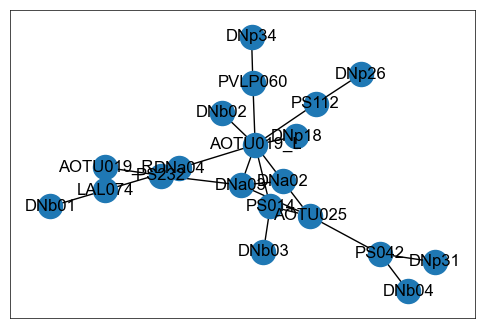

In [287]:
# nx.draw(G)
nx.draw_networkx(G, arrows=True, edge_color='k', font_color='k')

# Get NTs

In [288]:
#load data
datapath = "/Users/julianarhee/Documents/rutalab/projects/connectome/hemibrain_with_nt/"

ntneurons = pd.read_csv(datapath+"traced-neurons_withnt_log.csv")
#conns = pd.read_csv(datapath+"traced-total-connections.csv")
ntneurons.head()

,bodyId,type,instance,nsyn,nts_8.gaba,nts_8.acetylcholine,nts_8.glutamate,nts_8.serotonin,nts_8.octopamine,nts_8.dopamine,nts_8.neither
0,200326126,CL141,CL141_L,395,-1637.569103,-1888.178775,-115.398941,-2894.561977,-3152.783836,-3294.689383,-3033.630977
1,202916528,FS4C,FS4C(FQ12)_C4_R,95,-281.183170,-86.241238,-196.321907,-393.107415,-396.630807,-336.701775,-456.901449
2,203253072,FS4A,FS4A(AB)(FQ12)_C3_R,62,-165.951447,-94.500780,-137.059344,-259.347036,-233.968705,-165.310550,-278.062386
3,203253253,SMP505,SMP505(PDM22)_L,415,-1351.742617,-602.526716,-833.393866,-1792.570149,-1372.042299,-1084.583954,-1738.116443
4,203257652,FS4C,FS4C(FQ12)_C6_R,65,-166.173308,-60.672929,-111.419482,-282.400009,-260.562126,-198.255095,-266.419780


In [289]:
nt_cols = [c for c in ntneurons.columns if c.startswith('nts_')]

In [290]:
# Use melt to transform the DataFrame
nt_melted = ntneurons.melt(id_vars=['bodyId', 'type', 'instance', 'nsyn'], value_vars=nt_cols, 
                    var_name='neurotransmitter', value_name='loglikelihood')

In [291]:
nt_melted

,bodyId,type,instance,nsyn,neurotransmitter,loglikelihood
0,200326126,CL141,CL141_L,395,nts_8.gaba,-1637.569103
1,202916528,FS4C,FS4C(FQ12)_C4_R,95,nts_8.gaba,-281.183170
2,203253072,FS4A,FS4A(AB)(FQ12)_C3_R,62,nts_8.gaba,-165.951447
3,203253253,SMP505,SMP505(PDM22)_L,415,nts_8.gaba,-1351.742617
4,203257652,FS4C,FS4C(FQ12)_C6_R,65,nts_8.gaba,-166.173308
...,...,...,...,...,...,...
152168,7112579856,LC20,LC20,319,nts_8.neither,-1865.225238
152169,7112615127,AVLP335,AVLP335_R,362,nts_8.neither,-2157.030577
152170,7112617294,AVLP331,AVLP331_R,285,nts_8.neither,-1557.827464
152171,7112622044,LAL137,LAL137(PVL05)_L,1376,nts_8.neither,-8115.714007


In [292]:
# Test sourcing
idx_max = nt_melted[nt_melted['type']=='AOTU019'].groupby('bodyId')['loglikelihood'].idxmax()

# Get the value at that index in column 'C'
result = nt_melted[nt_melted['type']=='AOTU019'].loc[idx_max, ['bodyId', 'neurotransmitter']].reset_index(drop=True)
result

,bodyId,neurotransmitter
0,799868224,nts_8.gaba
1,1605518663,nts_8.gaba


In [293]:
nt_melted[nt_melted['bodyId']==aotu019_L]


,bodyId,type,instance,nsyn,neurotransmitter,loglikelihood
14700,1605518663,AOTU019,AOTU019(ADM10)_L,2111,nts_8.gaba,-2536.056861
36439,1605518663,AOTU019,AOTU019(ADM10)_L,2111,nts_8.acetylcholine,-10311.915200
58178,1605518663,AOTU019,AOTU019(ADM10)_L,2111,nts_8.glutamate,-6734.165973
79917,1605518663,AOTU019,AOTU019(ADM10)_L,2111,nts_8.serotonin,-15750.801159
101656,1605518663,AOTU019,AOTU019(ADM10)_L,2111,nts_8.octopamine,-12826.694786
123395,1605518663,AOTU019,AOTU019(ADM10)_L,2111,nts_8.dopamine,-16077.095451
145134,1605518663,AOTU019,AOTU019(ADM10)_L,2111,nts_8.neither,-13040.173095


In [294]:
nt_melted[nt_melted['bodyId']==1438515134] #aotu019a]

,bodyId,type,instance,nsyn,neurotransmitter,loglikelihood
13249,1438515134,PS231,PS231(PVM03)_L,626,nts_8.gaba,-3371.182684
34988,1438515134,PS231,PS231(PVM03)_L,626,nts_8.acetylcholine,-301.969927
56727,1438515134,PS231,PS231(PVM03)_L,626,nts_8.glutamate,-3449.116787
78466,1438515134,PS231,PS231(PVM03)_L,626,nts_8.serotonin,-3574.946605
100205,1438515134,PS231,PS231(PVM03)_L,626,nts_8.octopamine,-3530.157782
121944,1438515134,PS231,PS231(PVM03)_L,626,nts_8.dopamine,-3601.162392
143683,1438515134,PS231,PS231(PVM03)_L,626,nts_8.neither,-3341.270639


In [295]:
node_df['neurotransmitter'] = None
for src_id, node_ in node_df.groupby('source_id'):
    print(node_['source'])
    # Get max loglikelihood
    idx_max = nt_melted[nt_melted['bodyId']==src_id]['loglikelihood'].idxmax()
    
    # Get the value at that index in NT column
    src_nt = nt_melted[nt_melted['bodyId']==src_id].loc[idx_max, 'neurotransmitter'] #.reset_index(drop=True)

    node_df.loc[node_df['source_id']==src_id, 'neurotransmitter'] = src_nt

12    AOTU019_R
14    AOTU019_R
16    AOTU019_R
Name: source, dtype: object
18    AOTU025
20    AOTU025
22    AOTU025
23    AOTU025
24    AOTU025
Name: source, dtype: object
26    DNa03
Name: source, dtype: object
10    PS014
25    PS014
Name: source, dtype: object
0     AOTU019_L
2     AOTU019_L
4     AOTU019_L
5     AOTU019_L
6     AOTU019_L
7     AOTU019_L
8     AOTU019_L
9     AOTU019_L
11    AOTU019_L
Name: source, dtype: object
1    PVLP060
Name: source, dtype: object
13    PS232
Name: source, dtype: object
15    LAL074
17    LAL074
Name: source, dtype: object
19    PS042
21    PS042
Name: source, dtype: object
3    PS112
Name: source, dtype: object


In [296]:
node_df['neurotransmitter'].unique()

array(['nts_8.gaba', 'nts_8.glutamate', 'nts_8.acetylcholine'],
      dtype=object)

In [297]:
nt_lut = {'nts_8.gaba': 'in',
          'nts_8.acetylcholine': 'ex', 
          'nts_8.glutamate': 'in'
         }
inhib_nt = [ 'nts_8.gaba', 'nts_8.glutamate']
excit_nt = [ 'nts_8.acetylcholine']

In [298]:
node_df['nt_type'] = [nt_lut[v] for v in node_df['neurotransmitter']]
node_df.head()

,index,source_id,target_id,source,target,weight,neurotransmitter,nt_type
0,0,1605518663,1663759398,AOTU019_L,PVLP060,36,nts_8.gaba,in
1,1,1663759398,984030630,PVLP060,DNp34,25,nts_8.gaba,in
2,2,1605518663,5813070594,AOTU019_L,PS112,25,nts_8.gaba,in
3,3,5813070594,1100404634,PS112,DNp26,41,nts_8.glutamate,in
4,4,1605518663,1139909038,AOTU019_L,DNa03,352,nts_8.gaba,in


In [299]:
G_ex = nx.from_pandas_edgelist(node_df[node_df['nt_type']=='ex'])
G_in = nx.from_pandas_edgelist(node_df[node_df['nt_type']=='in'])

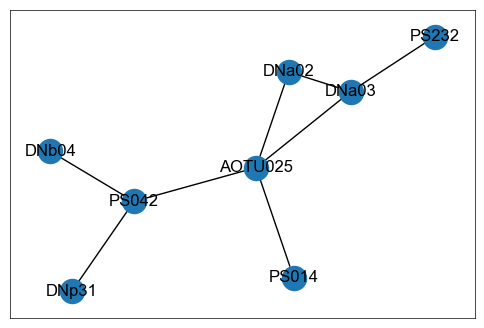

In [300]:
nx.draw_networkx(G_ex, arrows=True, font_color='k', edge_color='k')

## Plot (from Rishika)


In [301]:
aotu_list = ['AOTU019_L', 'AOTU019_R', 'AOTU025']

In [302]:
for i in G.edges:
    print(i)

('AOTU019_L', 'PVLP060')
('AOTU019_L', 'PS112')
('AOTU019_L', 'DNa03')
('AOTU019_L', 'DNa02')
('AOTU019_L', 'DNa04')
('AOTU019_L', 'DNb02')
('AOTU019_L', 'PS014')
('AOTU019_L', 'DNp18')
('PVLP060', 'DNp34')
('PS112', 'DNp26')
('DNa03', 'PS232')
('DNa03', 'AOTU025')
('DNa03', 'DNa02')
('DNa02', 'AOTU025')
('DNa04', 'LAL074')
('PS014', 'DNb03')
('PS014', 'AOTU025')
('AOTU019_R', 'PS232')
('AOTU019_R', 'LAL074')
('LAL074', 'DNb01')
('AOTU025', 'PS042')
('PS042', 'DNp31')
('PS042', 'DNb04')


In [303]:
G.edges('DNa03')

for i, v in G.edges('DNa03'):
    v

In [304]:
G.edges

EdgeView([('AOTU019_L', 'PVLP060'), ('AOTU019_L', 'PS112'), ('AOTU019_L', 'DNa03'), ('AOTU019_L', 'DNa02'), ('AOTU019_L', 'DNa04'), ('AOTU019_L', 'DNb02'), ('AOTU019_L', 'PS014'), ('AOTU019_L', 'DNp18'), ('PVLP060', 'DNp34'), ('PS112', 'DNp26'), ('DNa03', 'PS232'), ('DNa03', 'AOTU025'), ('DNa03', 'DNa02'), ('DNa02', 'AOTU025'), ('DNa04', 'LAL074'), ('PS014', 'DNb03'), ('PS014', 'AOTU025'), ('AOTU019_R', 'PS232'), ('AOTU019_R', 'LAL074'), ('LAL074', 'DNb01'), ('AOTU025', 'PS042'), ('PS042', 'DNp31'), ('PS042', 'DNb04')])

In [305]:
connection_values = {}
for ix, (i, j) in enumerate(G.edges):
    n_conns = sum(node_df[ (node_df['source']==i) & (node_df['target']==j) ]['weight'].values)
    if n_conns == 0: # source and target got switched in G.edges
        connection_values['{}_{}'.format(j, i)] = sum(node_df[ (node_df['source']==j) & (node_df['target']==i) ]['weight'].values)
        #G.edges[ix] = (j, i)
    else:
        connection_values['{}_{}'.format(i, j)] = sum(node_df[ (node_df['source']==i) & (node_df['target']==j) ]['weight'].values)
connection_values

{'AOTU019_L_PVLP060': 36,
 'AOTU019_L_PS112': 25,
 'AOTU019_L_DNa03': 352,
 'AOTU019_L_DNa02': 192,
 'AOTU019_L_DNa04': 93,
 'AOTU019_L_DNb02': 75,
 'AOTU019_L_PS014': 211,
 'AOTU019_L_DNp18': 23,
 'PVLP060_DNp34': 25,
 'PS112_DNp26': 41,
 'PS232_DNa03': 127,
 'AOTU025_DNa03': 115,
 'DNa03_DNa02': 271,
 'AOTU025_DNa02': 160,
 'LAL074_DNa04': 147,
 'PS014_DNb03': 52,
 'AOTU025_PS014': 26,
 'AOTU019_R_PS232': 30,
 'AOTU019_R_LAL074': 50,
 'LAL074_DNb01': 58,
 'AOTU025_PS042': 84,
 'PS042_DNp31': 129,
 'PS042_DNb04': 31}

In [306]:
connection_values_in = {}
for ix, (i, j) in enumerate(G_in.edges):
    n_conns = sum(node_df[ (node_df['source']==i) & (node_df['target']==j) ]['weight'].values)
    if n_conns == 0: # source and target got switched in G.edges
        connection_values_in['{}_{}'.format(j, i)] = sum(node_df[ (node_df['source']==j) & (node_df['target']==i) ]['weight'].values)
        #G.edges[ix] = (j, i)
    else:
        connection_values_in['{}_{}'.format(i, j)] = sum(node_df[ (node_df['source']==i) & (node_df['target']==j) ]['weight'].values)
connection_values_ex = {}
for ix, (i, j) in enumerate(G_ex.edges):
    n_conns = sum(node_df[ (node_df['source']==i) & (node_df['target']==j) ]['weight'].values)
    if n_conns == 0: # source and target got switched in G.edges
        connection_values_ex['{}_{}'.format(j, i)] = sum(node_df[ (node_df['source']==j) & (node_df['target']==i) ]['weight'].values)
        #G.edges[ix] = (j, i)
    else:
        connection_values_ex['{}_{}'.format(i, j)] = sum(node_df[ (node_df['source']==i) & (node_df['target']==j) ]['weight'].values)
connection_values

#connection_values = {}
# for i, j in G_in.edges:
#     connection_values['{}_{}'.format(i, j)] = sum(node_df[ (node_df['source']==i) & (node_df['target']==j) ]['weight'].values)
# for i, j in G_ex.edges:
#     connection_values['{}_{}'.format(i, j)] = sum(node_df[ (node_df['source']==i) & (node_df['target']==j) ]['weight'].values)

{'AOTU019_L_PVLP060': 36,
 'AOTU019_L_PS112': 25,
 'AOTU019_L_DNa03': 352,
 'AOTU019_L_DNa02': 192,
 'AOTU019_L_DNa04': 93,
 'AOTU019_L_DNb02': 75,
 'AOTU019_L_PS014': 211,
 'AOTU019_L_DNp18': 23,
 'PVLP060_DNp34': 25,
 'PS112_DNp26': 41,
 'PS232_DNa03': 127,
 'AOTU025_DNa03': 115,
 'DNa03_DNa02': 271,
 'AOTU025_DNa02': 160,
 'LAL074_DNa04': 147,
 'PS014_DNb03': 52,
 'AOTU025_PS014': 26,
 'AOTU019_R_PS232': 30,
 'AOTU019_R_LAL074': 50,
 'LAL074_DNb01': 58,
 'AOTU025_PS042': 84,
 'PS042_DNp31': 129,
 'PS042_DNb04': 31}

In [329]:
# start_pos = -50
# end_pos = 50 
#np.linspace(start_pos, end_pos, len(level_02_names))

edge_color = 'darkgrey'
dn_color = 'lightgrey'
level1_color = 'darkgrey'

edge_color_in = 'cornflowerblue'
edge_color_ex = 'red'

aotu_colors = ['whitesmoke', 'dimgray', 'dimgray']

In [380]:
# define a position map and label map for the graph
pos = {}
labels = {}
colors = {}

node_sz = 500

# AOTUs (ORNs)
n_aotus = 2 # n_accepted_orns
level_01_names = sorted([v for v in all_paths['type'] if not v.startswith('AOTU') and not v.startswith('DN')]) #all_paths.loc[1]['type'].unique())
level_02_names = sorted([v for v in all_paths['type'] if v.startswith('DN')]) #all_paths.loc[2]['type'].unique())
n_level_01 = len(level_01_names)
n_level_02 = len(level_02_names)

orn_offset = 400
start_pos = -1*orn_offset
end_pos = orn_offset

aotu_names = dict((k, v) for k, v in enumerate(aotu_list))

curr_positions = [-orn_offset/2, orn_offset/2] if len(aotu_list)==2 else [-orn_offset*4, -orn_offset/2, orn_offset*2]
for i, v in enumerate(aotu_list): # range(n_accepted_orns)
    pos[v] = (0, curr_positions[i]) #-i*orn_offset + orn_offset)
    labels[v] = v #aotu_list[i] #selected_orns_names[i].replace('ORN_','')+'(L)' if i < n_accepted_orns-1 else 'Other\nORN(L)'
    colors[v] = aotu_colors[i] #pl.cm.Purples(0.5-i/n_aotus/2) #plt.cm.Purples(0.5-i/n_accepted_orns/2)
    #pos[i+n_eff_classes] = (0, i+orn_offset)
    #labels[i+n_eff_classes] = selected_orns_names[i].replace('ORN_','')+'(R)' if i < n_accepted_orns-1 else 'Other\nORN(R)'
    #colors[i+n_eff_classes] = plt.cm.Reds(0.5-i/n_accepted_orns/2)
# PNs
#pn_offset = 25 #20*2000 #n_aotus
#for i in range(n_level_01): # range(n_accepted_orns)
pn_offset=100
curr_positions = np.linspace(start_pos*4, end_pos*4+pn_offset, len(level_01_names))
for i, v in enumerate(level_01_names):   
    pos[v] = (-1, curr_positions[i]) #-i*pn_offset + pn_offset)
    labels[v] = v #level_01_names[i] #selected_orns_names[i].replace('ORN_','')+'(L)' if i < n_accepted_orns-1 else 'Other\nORN(L)'
    colors[v] = level1_color #pl.cm.Purples(0.6) #0.5-i/n_level_01/2)
#pos[pn_offset] = (-2, -pn_offset)
#labels[pn_offset] = 'PN(L)'
#colors[pn_offset] = plt.cm.Purples(0.6)
#pos[n_accepted_orns+n_eff_classes] = (-2, pn_offset)
#labels[n_accepted_orns+n_eff_classes] = 'PN(R)'
#colors[n_accepted_orns+n_eff_classes] = plt.cm.Reds(0.6)

# # LNs
# pos[n_accepted_orns+1] = (-1.5, -ln_offset)
# labels[n_accepted_orns+1] = 'LN(L)'
# colors[n_accepted_orns+1] = plt.cm.Purples(0.3)
# pos[n_accepted_orns+1+n_eff_classes] = (-1.5, ln_offset)
# labels[n_accepted_orns+1+n_eff_classes] = 'LN(R)'
# colors[n_accepted_orns+1+n_eff_classes] = plt.cm.Reds(0.3)
    
# other neurons
other_neurons = n_level_02 #['KC', 'PAM\nDAN', 'PPL\nDAN', 'LH', 'Other']
dn_offset = 200 #node_sz * 5000
curr_positions = np.linspace(start_pos*4, end_pos*4+dn_offset, len(level_02_names))
for i, v in enumerate(level_02_names):
    pos[v] = (-2, curr_positions[i]) #-i*dn_offset + dn_offset) #n_aotus-2)
    labels[v] = v
    colors[v] = dn_color
# for i in range(n_eff_classes-n_accepted_orns-2):
#     pos[i+n_accepted_orns+2] = (-3, -i-other_offset)
#     labels[i+n_accepted_orns+2] = other_neurons[i]+'(L)'
#     colors[i+n_accepted_orns+2] = 'lightgray'
#     pos[i+n_accepted_orns+n_eff_classes+2] = (-3, i+other_offset)
#     labels[i+n_accepted_orns+n_eff_classes+2] = other_neurons[i]+'(R)'
#     colors[i+n_accepted_orns+n_eff_classes+2] = 'lightgray'

# sort the keys
pos = {k:(pos[k][1],pos[k][0]) for k in sorted(pos.keys())}
labels = {k:labels[k] for k in sorted(labels.keys())}
colors = {k:colors[k] for k in sorted(colors.keys())}

/Users/julianarhee/Documents/rutalab/projects/connectome/neuprint-playground/connectivity aotu019LR-25_wDNs-select-subset_connectivity_top5-prod_1-synapses_minweight-20


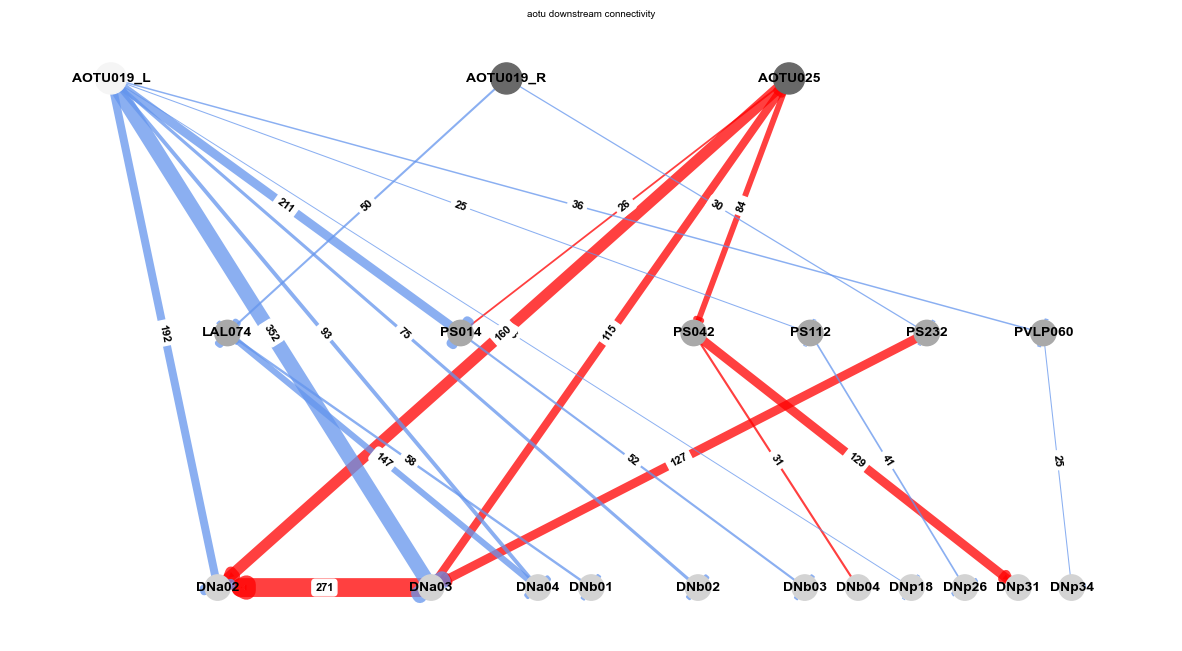

In [387]:
# draw the graph with arrow thickness proportional to the synapse count
log_fold = True

pl.figure(figsize=(15,8))
n_eff_classes = 1
# split into nodes and edges
nx.draw_networkx_nodes(
    G, 
    pos, 
    node_size=[node_sz if i in aotu_list else node_sz/1.5 for i in G.nodes], 
    node_color=[colors[i] for i in G.nodes]
    )
nx.draw_networkx_labels(
    G, 
    pos, 
    labels=labels, 
    font_size=10,
    font_weight='bold'
    )
# draw excitatory edges
nx.draw_networkx_edges(
    G_ex, #G_exc, 
    pos, 
    edge_color=edge_color_ex,
    #width = [connection_values['{}_{}'.format(i, j)]*0.05*(1 if log_fold else 50) for i,j in G_ex.edges],
    width = [v*0.05*(1 if log_fold else 50) for k, v in connection_values_ex.items()],
    #width=[np.abs(pos_matrix[i,j])*0.3*(1 if log_fold else 50)  for i,j in G.edges], #G_exc.edges], 
    arrowsize=10, 
    arrowstyle='-|>',
    arrows=True,
    node_size=10,
    alpha=0.75,
    #connectionstyle='arc3,rad=1'
    )
# draw inhibitory edges
nx.draw_networkx_edges(
    G_in, #G_inh, 
    pos, 
    edge_color=edge_color_in, #'orange', 
    #width = [connection_values['{}_{}'.format(i, j)]*0.07*(1 if log_fold else 50) for i,j in G_in.edges],
    width = [v*0.03*(1 if log_fold else 50) for k, v in connection_values_in.items()],
    #width=[np.abs(neg_matrix[i,j])*0.3*(1 if log_fold else 50) for i,j in G_inh.edges], 
    arrowsize=10, 
    arrows=True,
    arrowstyle='-[',
    node_size=7,
    alpha=0.75,
    #connectionstyle='arc3,rad=1'
    )

# add edge labels (synapse counts)
#edge_labels = {(i,j):int(abs(connection_values[i,j])) for i,j in G.edges} #G_exc.edges}
#edge_labels = {(i,j):int(abs(connection_values['{}_{}'.format(i, j)])) for i,j in G.edges} #G_exc.edges}
edge_labels = {( '_'.join(k.split('_')[0:-1]), k.split('_')[-1]):int(v) for k, v in connection_values.items()}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8, 
                             font_weight='bold', label_pos=0.5, font_color='k')
# edge_labels = {(i,j):int(abs(connection_values[i,j])) for i,j in G_inh.edges}
# nx.draw_networkx_edge_labels(G_inh, pos, edge_labels=edge_labels, font_size=5, font_weight='bold', label_pos=0.3, font_color='orange')

pl.axis('off')
pl.title('{} downstream connectivity'.format('aotu')) #orn_type))
figname = 'aotu019LR-25_wDNs-select-subset_connectivity_top{}-prod_{}-synapses_minweight-{}'.format( n_plot, n_nodes-1, min_weight) 
pl.savefig(os.path.join(figdir, '{}.pdf'.format(figname))) #/{}_downstream_connectivity.pdf'.format(orn_type))
print(figdir, figname)
pl.show()

In [382]:
connection_values

{'AOTU019_L_PVLP060': 36,
 'AOTU019_L_PS112': 25,
 'AOTU019_L_DNa03': 352,
 'AOTU019_L_DNa02': 192,
 'AOTU019_L_DNa04': 93,
 'AOTU019_L_DNb02': 75,
 'AOTU019_L_PS014': 211,
 'AOTU019_L_DNp18': 23,
 'PVLP060_DNp34': 25,
 'PS112_DNp26': 41,
 'PS232_DNa03': 127,
 'AOTU025_DNa03': 115,
 'DNa03_DNa02': 271,
 'AOTU025_DNa02': 160,
 'LAL074_DNa04': 147,
 'PS014_DNb03': 52,
 'AOTU025_PS014': 26,
 'AOTU019_R_PS232': 30,
 'AOTU019_R_LAL074': 50,
 'LAL074_DNb01': 58,
 'AOTU025_PS042': 84,
 'PS042_DNp31': 129,
 'PS042_DNb04': 31}

In [377]:
G_ex.edges

EdgeView([('PS232', 'DNa03'), ('DNa03', 'AOTU025'), ('DNa03', 'DNa02'), ('AOTU025', 'PS042'), ('AOTU025', 'DNa02'), ('AOTU025', 'PS014'), ('PS042', 'DNp31'), ('PS042', 'DNb04')])

In [270]:
G_in.edges

EdgeView([('AOTU019_L', 'PVLP060'), ('AOTU019_L', 'PS112'), ('AOTU019_L', 'DNa03'), ('AOTU019_L', 'DNa02'), ('AOTU019_L', 'PS196'), ('AOTU019_L', 'PS014'), ('PVLP060', 'DNp34'), ('PS112', 'DNp26'), ('PS014', 'DNb03'), ('AOTU019_R', 'PS232'), ('AOTU019_R', 'LAL074'), ('LAL074', 'DNa09'), ('LAL074', 'DNa04'), ('LAL074', 'DNb01')])

In [548]:
G.nodes

NodeView(('AOTU019', 'PS232', 'DNp07', 'DNa03', 'LAL074', 'DNa04', 'DNb01', 'AOTU025', 'PS042', 'DNp31', 'DNb04', 'DNa02', 'LAL018', 'DNp15'))

In [277]:
pos_spring=nx.spring_layout(G)

In [69]:
pos_spring

{'AOTU019': array([-0.24447527, -0.23455569]),
 'PS232': array([-0.43798687,  0.46138073]),
 'DNa03': array([-0.94590689,  0.99970294]),
 'LAL074': array([ 0.4370217 , -0.45927633]),
 'DNa04': array([ 0.94454763, -1.        ]),
 'DNa05': array([0.2467997 , 0.23274835])}